In [1]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.algorithms.moo.nsga3 import NSGA3
from pymoo.experimental.algorithms.mocmaes import MO_CMAES
from pymoo.factory import get_reference_directions
from pymoo.optimize import minimize
from pymoo.problems.multi import ZDT1, TNK
from pymoo.visualization.scatter import Scatter
from pysamoo.experimental.ParDen import ParDen

from sklearn.gaussian_process import GaussianProcessRegressor
gaussian_process = GaussianProcessRegressor()

problem = ZDT1(n_var=10)

ref_dirs = get_reference_directions("das-dennis", 2, n_points=20)

algorithm = NSGA2(pop_size=20, n_offsprings=10, ref_dirs=ref_dirs)

# algorithm = MO_CMAES(mu=20, sigma=0.1, lambda_=10)

algorithm = ParDen(algorithm,
                   n_initial_doe=20,
                   surrogate=gaussian_process, 
                   maxfill=True,
                   look_ahead=True)

res = minimize(
    problem,
    algorithm,
    ('n_evals', 250),
    seed=1,
    verbose=True)

n_gen |  n_eval |     igd      |      gd      |      hv      |     beta     |  nds_score   |   n_front   
    1 |      20 |  1.911750382 |  2.574224274 |  0.00000E+00 |     -1/-1/-1 |  0.392727935 |            5
    2 |      30 |  1.911750382 |  2.144342742 |  0.00000E+00 |     43/56/52 |  0.205009624 |            4
    3 |      40 |  1.697973057 |  1.873319805 |  0.00000E+00 |     25/39/36 |  0.506324032 |            7
    4 |      50 |  1.017805418 |  1.934079779 |  0.00000E+00 |     43/26/20 |  0.462990829 |            6
    5 |      60 |  0.376402900 |  1.683991674 |  0.106153012 |     44/29/24 |  0.541995036 |           10
    6 |      70 |  0.314733555 |  1.199832210 |  0.160394154 |     39/20/14 |  0.464397149 |            9
    7 |      80 |  0.252855533 |  0.552209543 |  0.273577814 |     32/20/15 |  0.527781785 |            8
    8 |      90 |  0.252855533 |  0.537299729 |  0.273577814 |     54/33/27 |  0.430273692 |            8
    9 |     100 |  0.201515984 |  0.419534415 

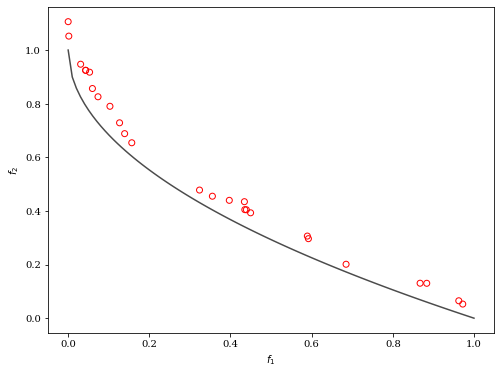

In [2]:
plot = Scatter()
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plot.add(res.F, facecolor="none", edgecolor="red")
plot.show()

In [3]:
# algorithm.setup(problem, seed=2, termination=('n_evals', 250))

# for k in range(3):
#     algorithm.next()
    # print(algorithm.n_gen)

In [4]:
import numpy as np

arr = np.array([[ 0.72676698,  0.93213482],
                [-0.30565392, -0.96605562],
                [ 0.85331367, -2.62963495],
                [ 0.87839643, -0.28283675],
                [ 0.72676698,  0.93213482],
                [-0.52007354,  0.27752806],
                [-0.08701666,  0.22764316],
                [-1.78897817,  0.50737573],
                [ 0.62260038, -1.96012161],
                [-1.98231706,  0.36523876],
                [-1.07587382, -2.3022289 ]])


In [5]:
np.isin(arr, arr)

array([[ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True]])

In [6]:
np.unique(arr, axis=0, return_inverse=True)

(array([[-1.98231706,  0.36523876],
        [-1.78897817,  0.50737573],
        [-1.07587382, -2.3022289 ],
        [-0.52007354,  0.27752806],
        [-0.30565392, -0.96605562],
        [-0.08701666,  0.22764316],
        [ 0.62260038, -1.96012161],
        [ 0.72676698,  0.93213482],
        [ 0.85331367, -2.62963495],
        [ 0.87839643, -0.28283675]]),
 array([7, 4, 8, 9, 7, 3, 5, 1, 6, 0, 2]))

In [7]:
arr

array([[ 0.72676698,  0.93213482],
       [-0.30565392, -0.96605562],
       [ 0.85331367, -2.62963495],
       [ 0.87839643, -0.28283675],
       [ 0.72676698,  0.93213482],
       [-0.52007354,  0.27752806],
       [-0.08701666,  0.22764316],
       [-1.78897817,  0.50737573],
       [ 0.62260038, -1.96012161],
       [-1.98231706,  0.36523876],
       [-1.07587382, -2.3022289 ]])